In [1]:
import pandas as pd 
import numpy as npnline
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
diabetes=pd.read_csv('C:/Users/admin/Downloads/diabetes.csv')
diabetes.shape

(768, 9)

In [7]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


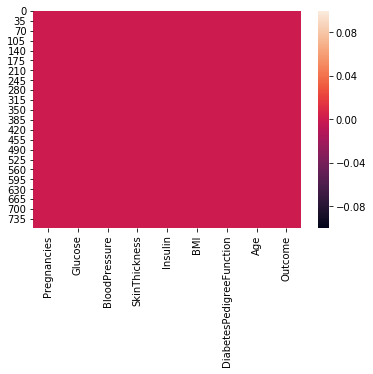

In [10]:
import seaborn as sns
sns.heatmap(diabetes.isnull())

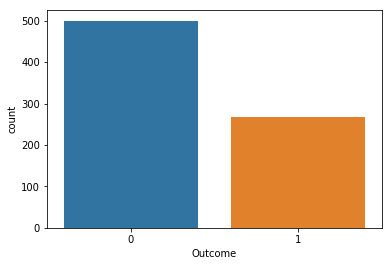

In [11]:
sns.countplot(diabetes['Outcome'],label='count')

In [12]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [13]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(diabetes.loc[:,diabetes.columns!='Outcome'],diabetes['Outcome'],stratify=diabetes['Outcome'],random_state=66)

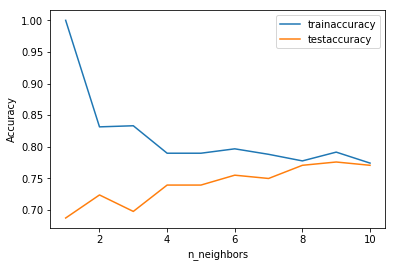

In [27]:
from sklearn.neighbors import KNeighborsClassifier
train_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)
    train_accuracy.append(knn.score(X_train,Y_train))
    test_accuracy.append(knn.score(X_test,Y_test))
plt.plot(neighbors_settings,train_accuracy,label='trainaccuracy')
plt.plot(neighbors_settings, test_accuracy,label="testaccuracy")
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
Knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)
print(knn.score(X_test,Y_test))

0.7708333333333334


In [41]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
506,0,180,90,26,90,36.5,0.314,35
709,2,93,64,32,160,38.0,0.674,23
257,2,114,68,22,0,28.7,0.092,25
518,13,76,60,0,0,32.8,0.180,41
432,1,80,74,11,60,30.0,0.527,22
